# Versuch 1

In [34]:
import numpy as np
import glob
import matplotlib.pyplot as plt

## Aufgabe2
### Daten einlesen

In [35]:
rawXArray = sorted(glob.glob("./Versuchwerte/Versuch1/*"))

meanArray = []
devArray = []

for fileName in rawXArray:  
    values = np.genfromtxt(fname=fileName,dtype=str, skip_header=1003)
    yArray = []
    for yStrings in values:
        yValue=yStrings.replace(",",".").split(";")
        yArray.append(float(yValue[1]))
    
    currMean = np.mean(yArray)
    currDev = np.std(yArray)
    meanArray.append(float(currMean))
    devArray.append(float(currDev))

### Mean und Deviation

In [36]:
def formatting(s):
    return s.replace("./Versuchwerte/Versuch1/","").replace("cm.csv","").replace(",",".")


plt.rcParams["figure.figsize"] = [5, 3.50]
plt.rcParams["figure.autolayout"] = True

xvalues= list(map(float,map(formatting,rawXArray)))
plt.plot(xvalues,meanArray,label='mean')
plt.plot(xvalues,devArray,label='deviation')

plt.legend()

plt.xlabel('cm')
plt.ylabel('volt')

plt.show()

ValueError: could not convert string to float: './Versuchwerte/Versuch1/10'

### Logarithmisierung der Ein- und der Ausgabe

In [ ]:
yValuesLog = []
xValuesLog = []

for x in meanArray:
    currMean = np.log(x)
    yValuesLog.append(float(currMean))
    
for x in rawXArray:
    currLog = np.log(float(formatting(x)))
    xValuesLog.append(float(currLog))

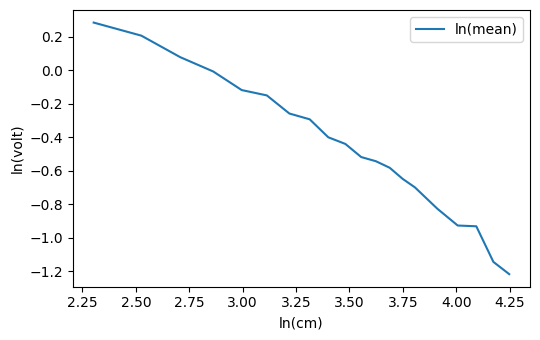

In [ ]:
plt.rcParams["figure.figsize"] = [5.50, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.plot(xValuesLog,yValuesLog,label="ln(mean)")

plt.legend()

plt.xlabel('ln(cm)')
plt.ylabel('ln(volt)')

plt.show()

plt.show()

### Lineare Regression

0.07978768493500346


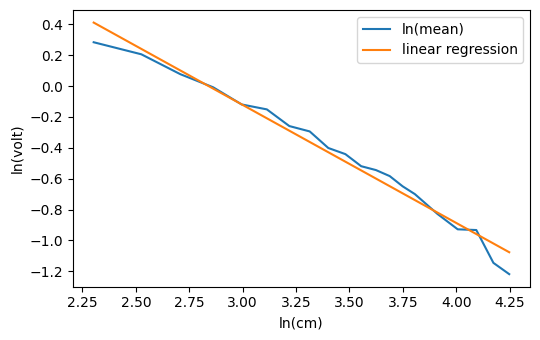

In [ ]:
meanofXLog = np.mean(xValuesLog)
meanOfYLog = np.mean(yValuesLog)


sumA = 0
sumB = 0
for n in range(0,20):
    sumA += (xValuesLog[n]-meanofXLog ) * (yValuesLog[n] - meanOfYLog)
    sumB += (xValuesLog[n]-meanofXLog )**2

slope = sumA / sumB
offset = meanOfYLog - slope * meanofXLog

def line(x,a,b):
    return a*x+b

xStart = xValuesLog[0]
xEnd = xValuesLog[len(xValuesLog)-1]

plt.plot(xValuesLog,yValuesLog,label="ln(mean)")
plt.plot([xStart,xEnd],[line(xStart,slope,offset),line(xEnd,slope,offset)],label="linear regression")

plt.legend()

plt.xlabel('ln(cm)')
plt.ylabel('ln(volt)')


#Calculating the quadratic deviation of our linear regression to our data set
totalDelta = 0.0
for x in range(0,20):
    y = line(xValuesLog[x],slope,offset)
    delta = (y-yValuesLog[x])**2
    totalDelta += delta
print(totalDelta)
    

### Umkehrung der doppelten Logarithmierung

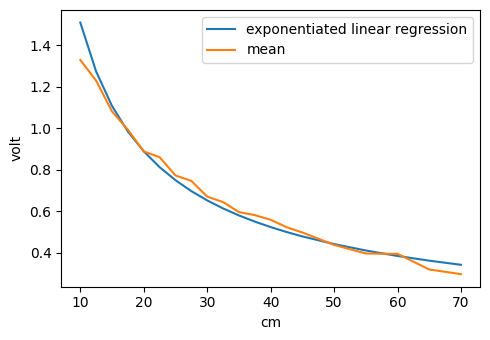

In [ ]:
def expoLine(x,a,b):
    return np.exp(a*np.log(x)+b)

def expoLineRange(a,b,liste):
    value = []
    for x in liste:
        value.append(expoLine(x,a,b))
    return value

plt.rcParams["figure.figsize"] = [5, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.plot(xvalues,expoLineRange(slope,offset,xvalues),label="exponentiated linear regression")
plt.plot(xvalues,meanArray,label="mean")

plt.legend()

plt.xlabel('cm')
plt.ylabel('volt')

plt.show()


## Aufgabe 3
### Länge DINA4

In [ ]:
def readAndFormat(path):
    readRaw = np.genfromtxt(fname=path,dtype=str, skip_header=1003)
    yValues = []
    for yRaw in readRaw:
        yValue=yRaw.replace(",",".").split(";")
        yValues.append(float(yValue[1]))
    mean = (float(np.mean(yValues)))
    deviation = (float(np.std(yValues))/sqrt(len(yValues)))
    return (mean,deviation)

lengthValues = readAndFormat("./Versuchwerte/laengeDINA4.csv")
meanLength = lengthValues[0]
deviationLength = lengthValues[1]


t = 1.0
print("x = " + str(meanLength) + " +- "+ str(t)+ "* " + str(deviationLength) + " = ["+ str(meanLength-t*deviationLength) +"," + str(meanLength+t*deviationLength) + "] für 68% safety")
t = 1.96
print("x = " + str(meanLength) + " +- "+ str(t)+ "* " + str(deviationLength) + " = ["+ str(meanLength-t*deviationLength) +"," + str(meanLength+t*deviationLength) + "] für 95% safety")


deltaYLength = t * deviationLength

x = 0.6778140592173018 +- 1.0* 0.02608453275064576 = [0.651729526466656,0.7038985919679475] für 68% safety
x = 0.6778140592173018 +- 1.96* 0.02608453275064576 = [0.626688375026036,0.7289397434085675] für 95% safety


## Fortplfanzungsfunktion nach Δx umstellen 
1. $\ Δy = a*e^b * x^{a-1} * Δx $ \
2. $\ Δy/(a*e^b * x^{a-1}) =  Δx $ 

## Umkehrfunktion von exponentiated linear regression:
 ### $\ x = \sqrt[a]{y/e^b} $

In [ ]:
lengthCm = ((meanLength)/np.exp(offset))**(1/slope)

print("Die gemessene Durchschnittslänge vom DINA4 Blatt " + str(lengthCm))
print("x = ["+ str(((meanLength+deltaYLength)/np.exp(offset))**(1/slope)) + "," + str(((meanLength-deltaYLength)/np.exp(offset))**(1/slope)) + "]")


Die gemessene Durchschnittslänge vom DINA4 Blatt 28.485494414156317
x = [25.902123016732492,31.561067621193843]


In [ ]:
def calculateDeltaX(deltaY,xMean):
    deltaX =  (deltaY) / (slope*np.exp(offset)* xMean **(slope-1))
    print("Delta X = " + str(abs(deltaX)))
    print("x ≈ ["+  str(xMean + deltaX) + "," + str(xMean - deltaX) + "]")
    return deltaX

deltaXLength = calculateDeltaX(deltaYLength,lengthCm)

Delta X = 2.8090127970867678
x ≈ [25.67648161706955,31.294507211243086]


### Breite DINA4

In [ ]:
widthValues = readAndFormat("./Versuchwerte/breiteDINA4.csv")
meanWidth = widthValues[0]
deviationWidth = widthValues[1]


widthCm = ((meanWidth)/np.exp(offset))**(1/slope)

print("Die gemessene Durchschnittsbreite vom DINA4 Blatt " + str(widthCm))

deltaYWidth = t * deviationWidth

deltaXWidth = calculateDeltaX(deltaYWidth,widthCm)

Die gemessene Durchschnittslänge vom DINA4 Blatt 20.294617743857394
Delta X = 1.5832346139766516
x ≈ [18.711383129880744,21.877852357834044]


### Fläche DINA4

$\ ∆y =  \sqrt{(∂/∂x_1 f(x) * ∆x_1)² + ⋯ + (∂/∂x_m f(x) * ∆x_m)²} $

$\ a = l * w $

$\ ∆y = \sqrt{(w * ∆x_{length})² + (l * ∆x_{widht})²} $ 


In [ ]:
area = widthCm * lengthCm
print("Fläche = " + str(area))
areaDeltaY = np.sqrt((widthCm * deltaXLength ) ** 2 + (lengthCm * deltaXWidth ) ** 2)
print("Delta Y für Fläche = " + str(areaDeltaY))
print("Fläche mit fehler = ["+  str(area - areaDeltaY) + "," + str(area + areaDeltaY) + "]")
#print("Relativer Messfehler für Fläche = "+ str(areaDeltaY / area))
#print("Relativer Messfehler für Breite = "+ str(abs(deltaXWidth / widthCm)))
#print("Relativer Messfehler für Länge = "+ str(abs(deltaXLength / lengthCm)))

Fläche = 578.1022203800875
Delta Y für Fläche = 72.68998309804998
Fläche mit fehler = [505.4122372820375,650.7922034781375]
